# 数値解析ゼミ 〜Julia入門〜

プログラミング言語の一つであるJuliaの基本的な使い方について述べていく．

このページではたくさんのコードを例示する．

コードは基本的には「セル」の中に表示されており，出力がそのすぐ下に表示される．

セル内の「\#」から始まる文章は理解を助けるための“コメント文”であり，Julia本体には読み込まれない．

例えば，

In [ ]:
# これは一行目のコメントである
spam = 1 # これは二行目のコメントで
         # これは3行目のコメントである。
text = '# この文章は、クォーテーションの内側にあるためコメントではない。'

このようにして，適宜コメントを残すことができる．
実際のITの開発現場ではこのコメント文が大事だったりする（プロジェクトの引き継ぎ時など）．

しかし，
`text = '# この文章は、クォーテーションの内側にあるためコメントではない。'`
の部分はコメント分として機能していないため，エラーが表示されている．

こういうときは，文頭に`#`を置いて**コメントアウト**すれば良い．

In [ ]:
# これは一行目のコメントである
spam = 1 # これは二行目のコメントで
         # これは3行目のコメントである。
#text = '# この文章は、クォーテーションの内側にあるためコメントではない。'

ほらね．コメントアウトしたことで，
`text = '# この文章は、クォーテーションの内側にあるためコメントではない。'`
の部分はプログラム内で読み込まれなくなった．

なお，上の例の二行目は `spam` という変数に数字の1を割り当てるという意味である．
（そのため，出力結果に`1`と表示されている．）

殆どのプログラミング言語では，このような **変数** を用いることができる．変数は，数字や文字などを保持しておく入れ物のようなものであると考えてもらえればよい．

Juliaの変数は

+ 英字から始まる好きな文字列を用いることができる
+ 大文字と小文字は区別する
+ **function** などいくつかの文字列は予約されているため使うことができない
+ (UTF-8エンコードを使った)ユニコードの名前を使用可能

などが特徴である．

ここで，

+ (UTF-8エンコードを使った)ユニコードの名前を使用可能

の例については，以下を参照．

バックスラッシュ`\`の後にLaTeXのシンボル名とタブキーを入力すれば，ユニコードの数学記号を入力できる．例えば，εという変数名は，`\varepsilon`と入力後に「tabキー」を打てばよい．

In [ ]:
ε = 0.00001

（詳しくは，https://mnru.github.io/julia-doc-ja-v1.0/manual/variables.html
などを参照のこと．）

## 1. Julia を電卓として使う

Juliaは簡単な電卓のように使うことができる．
例えば，四則演算は`+`,`-`,`*`, `/`を用いることで計算ができる．

### 1.1 簡単な四則計算

In [ ]:
2+2

In [ ]:
50-5*6

In [ ]:
(50-5*6)/4 

またJuliaでは指数も簡単に計算できる．

In [ ]:
5^2 # 5の２乗

In [ ]:
2^7 # ２の７乗

### 1.2 代入演算

以下は変数に計算結果を代入する例である．

イコール記号`=`は，変数に値を割り当てることを意味する．

In [ ]:
width = 20
height = 5*9
square = width * height
print(square)

なお，上のソースコードの`print()`はプリント関数と呼ばれ，引数に対して画面出力を行う関数である．

それでは，実際にJuliaを用いて，次の例題を解いてみよう．

例）ある物質に電圧 $V= 50\  \rm{V}$ をかけたところ，電流 $I = 2.0\  \rm{A}$ が流れた．                    
　　このとき電気抵抗 $R$ はいくらになるか？                              
　（ヒント：定常電源に対するOhm則: $V = RI$ を式変形すると....？）

In [ ]:
# 解答をこのセルに記入しよう




### 1.3 シンボリック計算

実は，Juliaは文字変数を文字変数のまま演算可能である．
そのためにまずは，**SymPy**というパッケージが必要なので，以下のセルを実行しよう．

In [ ]:
using Pkg
Pkg.add("SymPy")

実行が終了したら，**SymPy**の利用を宣言をしよう．

In [ ]:
using SymPy

このSymPyというパッケージを用いると，微分積分の計算をシンボリックのまま行ってくれる．

例）
$$
\int x^2 dx
$$

In [ ]:
@vars x  # x をシンボルとして宣言！
integrate(x^2) 

ここで，`integrate()`は引数に対し，積分結果を返す関数である．

この関数は引数を2つとることが可能で，第1引数は被積分関数，第2引数は積分区間を入力可能である．

次の例で確認してみよう．

例）
$$
\int_0^1 x^2 dx
$$

In [ ]:
@vars x  # x をシンボルとして宣言！
integrate(x^2, (x,0,1)) 

ちなみに第2引数のとり方だが，`(x,0,1)`のように入れ子でさらに指定することになる．

この場合は，「積分変数 $x$ に対して，下端$0$, 上端$1$を代入せよ」という命令を行っている．

いま上の例では積分を扱ったが，もちろん微分も可能である．

ここで準備として，関数 $f(t) = t^2 + 3t + 2$ を用意しよう．

In [ ]:
@vars t # t をシンボルとして宣言！
f(t) = t^2 + 3t + 2 # Juliaでは直観的な関数の定義も可能！
y = f(t)

もちろん，ここでシンボリックに定義したこの関数 $y = f(t)$ は引数に値を返してくれる．

In [ ]:
f(3)

さて，そうしたら次の例で微分演算の確認してみよう．

例）
$$
\frac{df}{dt}(t)
$$

In [ ]:
diff(f)

ここで，`diff()`は引数に対し，微分結果を返す関数である．

この関数は引数を2つとることが可能で，第1引数は微分したい関数，第2引数は微分階数を入力可能である．

次の例で確認してみよう．

例）
$$
\frac{d^2 f}{dt^2}(t)
$$

In [ ]:
diff(f, 2) # 二階微分

SymPyパッケージでは，微分積分の他にも，因数分解なども可能である．

先ほど定義した関数 $f(t) = t^2 + 3t + 2$ を因数分解してみよう．
`factor()`という関数で $f(t)$ を引数に指定すればすぐに実行結果が出る．

In [ ]:
factor(f(t)) # 因数分解

### *1.4 応用例（方程式の求解）

このセクションでは，SymPyパッケージの応用例として，いくつかの方程式の求解を紹介する．

#### i) 代数方程式の解


先ほどから何度も使っている関数 $f(t) = t^2 + 3t + 2$ をここでも使おう．

ここで，$f(t) = 0$ を解いてみよう．

In [ ]:
solve(f(t)) # solve(f(t)) で f(t) = 0 の解を求めてくれる！

#### ii) 一階線形常微分方程式の一般解

実は，常微分方程式も解くことが可能だったりする（！！）

そこで，まず簡単な例として，関数 $z(s)$ に対して以下のODEを考える：

$$
\frac{dz}{ds} = az.
$$

ここで，$a = const.$

この方程式を手で解く場合は変数分離によって，

$$
z = C \exp (as)
$$

と解けるわけである(ただし，$C$ は任意定数)．

手で解いた結果と同じ結果を返してくれるか検証しよう！

In [ ]:
@vars a # a を変数シンボルとして宣言
@vars s # s を変数シンボルとして宣言
z = symbols("z", cls=sympy.Function) # z を関数シンボルとして宣言
ODE = Eq(z(s).diff(s), a*z(s)) # 微分方程式の表現

In [ ]:
dsolve(ODE, z(s)) # 微分方程式の求解

#### iii) 二階線形常微分方程式の一般解

今度は，物理現象における数理モデルの基礎である一次元自由落下問題を考える．

（例として下図参照）

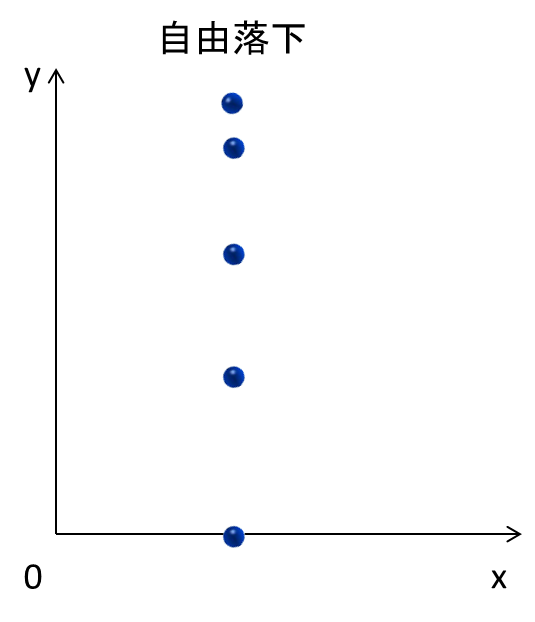

質点 $m$ ，重力加速度 $g$ の系において，時刻 $t$ における鉛直方向座標 $y$ は次のように記述される：

$$
m \frac{d^2 y}{dt^2} = -mg
$$

これを手で解く場合は両辺 $t$ で逐次積分していけばよいから，

$$
y = -\frac{1}{2}gt^2 + C_1 t + C_2
$$

と解けるわけである(ただし，$C_1,C_2$ は任意定数)．

手で解いた結果と同じ結果を返してくれるか検証しよう！

In [ ]:
@vars t # t を変数シンボルとして宣言
@vars m # m を変数シンボルとして宣言
@vars g # g を変数シンボルとして宣言
y = symbols("y", cls=sympy.Function) # z を関数シンボルとして宣言
ODE2 = Eq(m*(y(t).diff(t,2)), -m*g) # 微分方程式の表現

In [ ]:
dsolve(ODE2, y(t)) # 微分方程式の求解